In [1]:
# Importing the packages

In [2]:
#Importing packages

## Importing important stuff
import random
import numpy as np
import pandas as pd
from PIL import Image 
import tifffile as tiff
             ###############
#plotting
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
            ####################


In [ ]:
#tiff reads the image as a numpy array

In [13]:
C12 = tiff.imread('/users/PAS1495/akl2/work/Project/new_data/c12_300_.tif')
C13 = tiff.imread('/users/PAS1495/akl2/work/Project/new_data/c13_300_.tif')
C14 = tiff.imread('/users/PAS1495/akl2/work/Project/new_data/c14_300_.tif')

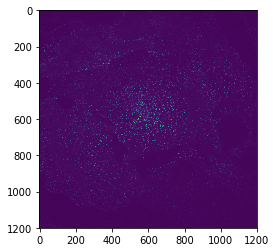

In [15]:
plt.imshow(a[0])

In [16]:
# The even ones are the HSNR (gd ones) and the odd ones are the LSNR. 
#I want to store them in a dataframe. 


In [27]:
list(range(0,10,2))

[0, 2, 4, 6, 8]

In [34]:
gd= []
bd= []
for i in range(0,599,2):
    #print(i)
    gd.append(C12[i].reshape(1200*1200))
    gd.append(C13[i].reshape(1200*1200))
    gd.append(C14[i].reshape(1200*1200))
    bd.append(C12[i+1].reshape(1200*1200))
    bd.append(C13[i+1].reshape(1200*1200))
    bd.append(C14[i+1].reshape(1200*1200))
    

In [35]:
len(gd)

900

In [37]:
x_test = np.asarray(bd)
y_test = np.asarray(gd)


In [41]:
X= x_test.reshape(x_test.shape[0], 1200, 1200)
y= y_test.reshape(y_test.shape[0], 1200, 1200)

In [55]:

X_crop=[]
for sample in X:
    #x_reshaped=sample.reshape(1200,1200)
    for i in range(2,7):
        for j in range(2,7):
            X_crop.append(sample[i*128:(i+1)*128, j*128:(j+1)*128])
            
y_crop=[]
for sample in y:
  #  y_reshaped=sample.reshape(1200,1200)
    for i in range(2,7):
        for j in range(2,7):
            y_crop.append(sample[i*128:(i+1)*128, j*128:(j+1)*128])

In [56]:
X_crop = np.asarray(X_crop)
y_crop  = np.asarray(y_crop)

In [44]:
print('shape of  bad images', X_crop.shape)
print('shape of  good images',y_crop.shape)

shape of  bad images (22500, 128, 128)
shape of  good images (22500, 128, 128)


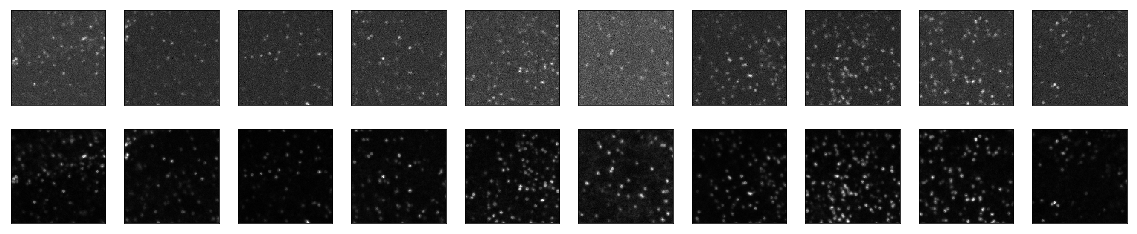

In [58]:
#checking correspondance 
#####check for correspondance
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_crop[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
        # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_crop[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [60]:
# create a list of indices
#shuffle these indicies 
#use this indices to form shuffled arrays 
indices=list(range(len(X_crop)))
print('number of indices', len(indices))
np.random.shuffle(indices)
print('shuffled indices ',indices[:10])

number of indices 22500
shuffled indices  [5968, 12917, 8168, 21904, 12041, 2036, 12331, 6086, 12782, 16050]


In [61]:
len(X_crop[indices])

22500

In [62]:
X_shuffle = X_crop[indices]
y_shuffle = y_crop[indices]

In [50]:
print(X_crop)

[[[ 99 104 101 ... 101 102 106]
  [107 107 101 ... 103 102 105]
  [ 94 105 101 ... 103 102  99]
  ...
  [111 106 130 ...  96 104 103]
  [103 113 117 ... 103 106 104]
  [101 116 117 ... 105  94  98]]

 [[ 94 102  96 ... 101  96 103]
  [101 104 106 ...  93  99  99]
  [ 98 100  94 ...  97 100  98]
  ...
  [101  98 103 ...  99 103  97]
  [ 98 101 104 ... 101 101  99]
  [100  98  98 ... 100  99  98]]

 [[ 95 104 100 ...  98  97 102]
  [100 104 100 ...  95  97  97]
  [103 102 106 ... 102  98 104]
  ...
  [ 97 101  98 ...  99  98  97]
  [106 106  97 ... 100  98 101]
  [ 99 101 100 ... 104 100  99]]

 ...

 [[ 98 104  97 ... 104 102  99]
  [100 101  96 ...  99 101 102]
  [100  99  98 ... 100 101  96]
  ...
  [100  99 108 ...  97 100  96]
  [103 102  97 ... 103 101 100]
  [105 102  99 ... 100  99 101]]

 [[ 98 100  93 ... 101  99  99]
  [ 94 100  98 ...  96  97 100]
  [100 102 103 ...  95 103 104]
  ...
  [ 95 103 103 ... 101 101 102]
  [ 99 100 103 ...  97 101 101]
  [101 100 104 ... 102 100  

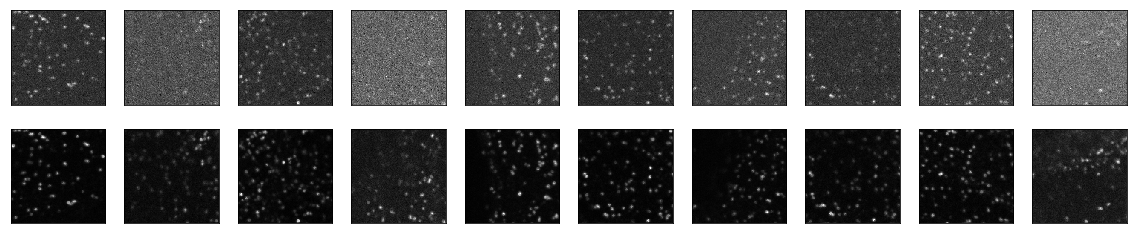

In [64]:
#checking correspondance 
#####check for correspondance
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_shuffle[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
        # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_shuffle[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [65]:
X_shuffle.shape

(22500, 128, 128)

In [66]:
np.save('x_true_test_128.npy', X_shuffle, allow_pickle = True)
np.save('y_true_test_128.npy', y_shuffle, allow_pickle = True)